In [1]:
#EJERCICIO 1

In [2]:
import os, geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import clip

In [3]:
countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [4]:
#Datos a importar:
trainsGB=gpd.read_file(os.path.join("maps","trainsUK","hotosm_gbr_railways_lines_shp.shp"))
trainsNI=gpd.read_file(os.path.join("maps","trainsUK","Rail Line NI_polyline.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))
UK_regiones=gpd.read_file(os.path.join("maps","ITL_1","ITL1_JAN_2025_UK_BFC.shp"))
UK_condados=gpd.read_file(os.path.join("maps","ITL_2","ITL2_JAN_2025_UK_BFC.shp"))
UK_distritos=gpd.read_file(os.path.join("maps","ITL_3","International_Territorial_Level_3_(January_2025)_Boundaries_UK_BFC_V2.shp"))

In [5]:
trainsGB = trainsGB.to_crs(27700)

In [6]:
trainsNI = trainsNI.to_crs(27700)

In [7]:
trainsUK = gpd.GeoDataFrame(
    pd.concat([trainsGB, trainsNI], ignore_index=True),
    crs=trainsGB.crs)

In [8]:
UK=countries[countries.COUNTRY=='United Kingdom']

In [9]:
UK=UK.to_crs(27700)

In [10]:
UK.centroid

227    POINT (348608.541 461155.382)
dtype: geometry

In [11]:
citiesUK=cities[cities.COUNTRY=='UK'].to_crs(27700)

In [12]:
infoairports=pd.read_csv(os.path.join("data","gb-airports.csv"))

In [13]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)

In [14]:
airportsUK=airports.to_crs(27700)

In [15]:
airportsUK.rename(columns={'type':'kind'},inplace=True)

In [16]:
#EJERCICIO 1

In [17]:
print(UK.crs,trainsUK.crs,UK_regiones.crs,airportsUK.crs,citiesUK.crs)

EPSG:27700 EPSG:27700 EPSG:27700 EPSG:27700 EPSG:27700


In [18]:
#--------------------------------------------------------------
#                             1
#--------------------------------------------------------------#

In [19]:
regiones_norte = UK.cx[:,461155.382:]

# 2. Recortamos los ríos usando clip
train_clipped = clip(trainsUK, regiones_norte)

<Axes: >

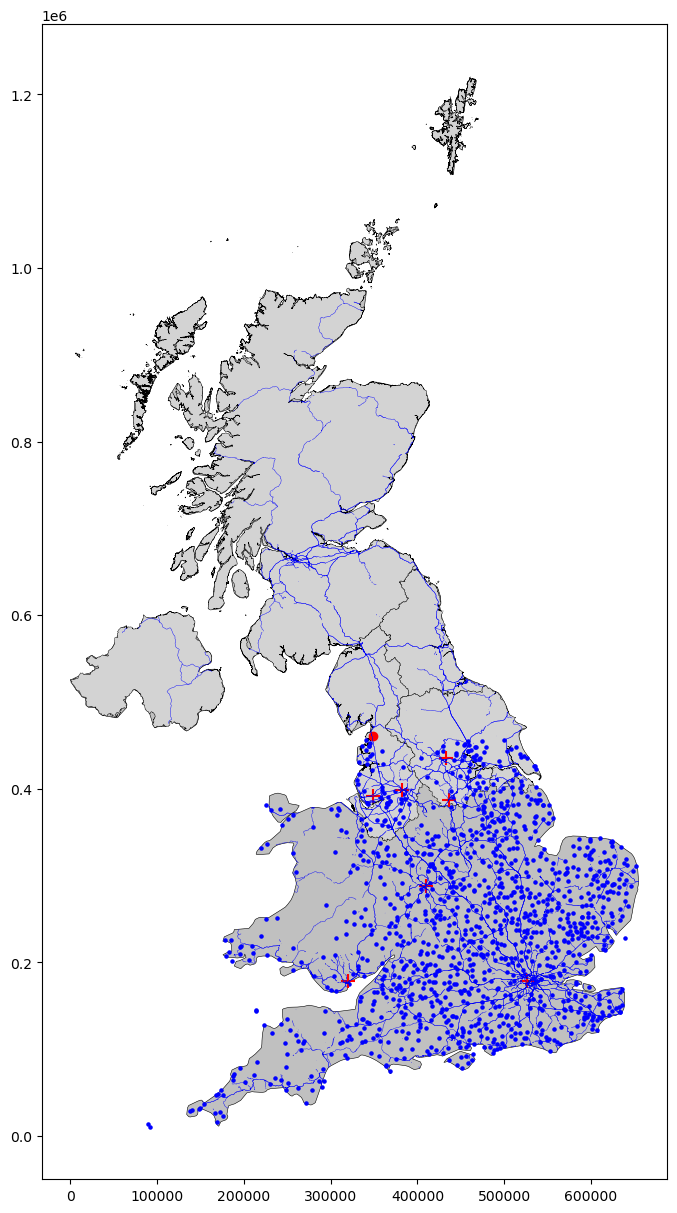

In [20]:
base = UK.plot(facecolor="silver", edgecolor='black', linewidth=0.4,figsize=(15,15))
UK_regiones.cx[:,461155.382:].plot(facecolor='lightgrey', edgecolor='black',linewidth=0.3,
                    ax=base)
train_clipped.plot(ax=base, edgecolor='blue', linewidth=0.3)
airportsUK.cx[:,:461155.382].plot( color='blue', markersize=5,
                    ax=base)
citiesUK.cx[:,:461155.382].plot(marker='+', color='red', markersize=90,
                    ax=base)
UK.centroid.plot(color='red',ax=base)

In [21]:
#--------------------------------------------------------------#
#                             2
#--------------------------------------------------------------#

<Axes: >

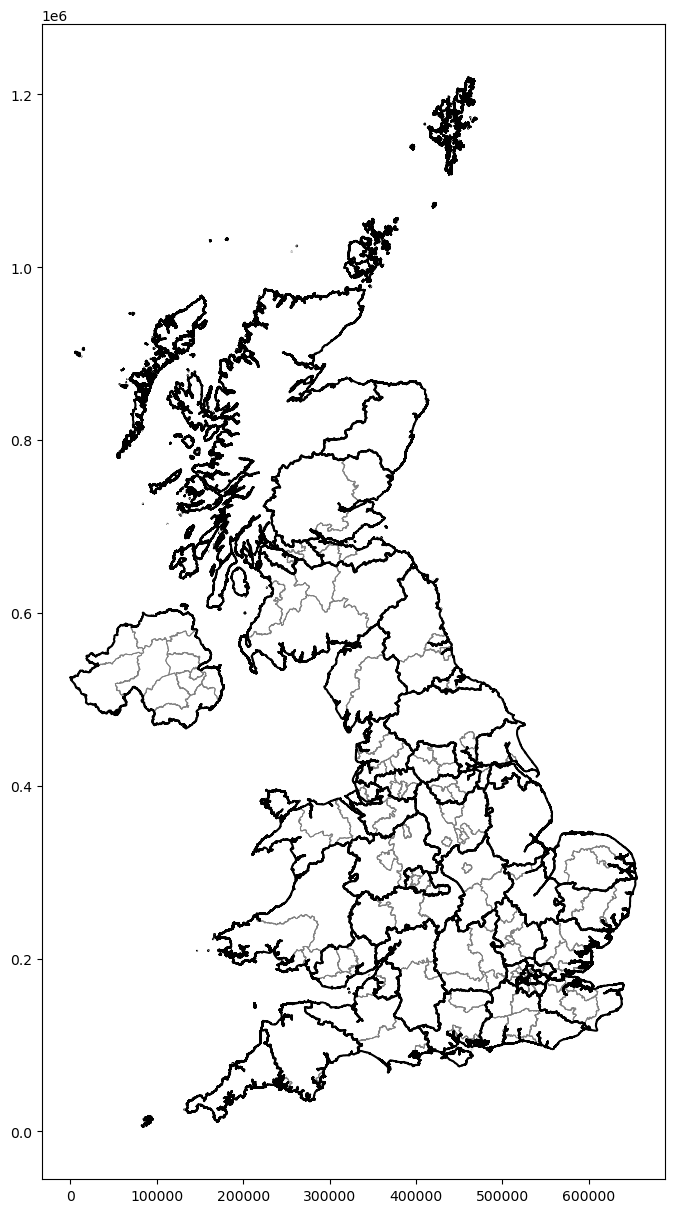

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
UK_distritos.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.7)
UK_condados.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)

In [23]:
UK_distritos['Condado'] = UK_distritos['ITL325CD'].str[:4]

In [24]:
UK_distritos.columns

Index(['FID', 'ITL325CD', 'ITL325NM', 'BNG_E', 'BNG_N', 'LAT', 'LONG',
       'Shape__Are', 'Shape__Len', 'GlobalID', 'geometry', 'Condado'],
      dtype='object')

In [25]:
orden_columnas = [
    'FID', 'Condado', 'ITL325CD', 'ITL325NM', 'BNG_E', 'BNG_N', 'LAT', 'LONG',
       'Shape__Are', 'Shape__Len', 'GlobalID', 'geometry']

UK_distritos = UK_distritos[orden_columnas]

In [26]:
UK_distritos.columns

Index(['FID', 'Condado', 'ITL325CD', 'ITL325NM', 'BNG_E', 'BNG_N', 'LAT',
       'LONG', 'Shape__Are', 'Shape__Len', 'GlobalID', 'geometry'],
      dtype='object')

In [27]:
len(set(UK_condados))

8

In [28]:
UK_condados.head()

,ITL225CD,ITL225NM,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,TLC3,Tees Valley,449140,521739,54.5885,-1.24112,31050e7e-fd0d-4ed4-8ffd-071632345546,"MULTIPOLYGON (((450259.6 525943.8, 450261.4 52..."
1,TLC4,"Northumberland, Durham and Tyne & Wear",402627,577731,55.0940,-1.96038,a823ed47-990e-4223-8195-f73348847456,"MULTIPOLYGON (((439170.69 557624.82, 439170.1 ..."
2,TLD1,Cumbria,341842,525692,54.6230,-2.90224,e8182039-7db8-47da-b31b-39c7c470009d,"MULTIPOLYGON (((321485.903 463795.299, 321473...."
3,TLD3,Greater Manchester,377929,401095,53.5061,-2.33424,ddc987f4-441e-4d53-9556-638d4d42f2f9,"POLYGON ((406087.197 404640.102, 406041.099 40..."
4,TLD4,Lancashire,362812,444720,53.8973,-2.56741,919d2406-9090-48eb-9aab-428eda32ab07,"MULTIPOLYGON (((337136.5 422474, 337133.067 42..."


<Axes: >

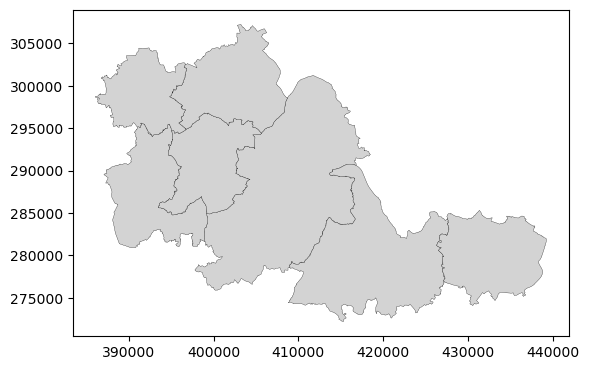

In [29]:
UK_distritos[UK_distritos.Condado=='TLG3'].plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

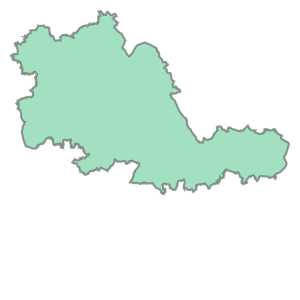

In [30]:
UK_distritos[UK_distritos.Condado=='TLG3'].union_all()

In [31]:
West_Midlands_union=UK_distritos[UK_distritos.Condado=='TLG3'].union_all()

In [32]:
gdf_union = gpd.GeoDataFrame(
    index=[0],
    data={'Condado': 'West_Midland'},
    crs=UK_distritos.crs,
    geometry=[West_Midlands_union])

In [33]:
gdf_union

,Condado,geometry
0,West_Midland,"POLYGON ((427600.697 284299.999, 427608.604 28..."


In [34]:
df_co2=pd.read_csv(os.path.join("data","2005-2022-local-authority-ghg-emissions-csv-dataset.csv"))
df_code=pd.read_csv(os.path.join("data","LAD_(December_2024)_to_LAU1_to_ITL3_to_ITL2_to_ITL1_(January_2025)_Lookup_in_the_UK.csv"))

In [35]:
df_merged = df_co2.merge(
    df_code[['LAD24CD', 'ITL325CD']],
    left_on='Local Authority Code',  
    right_on='LAD24CD',
    how='left'
)

In [36]:

co2_total_ITL3 = df_merged.groupby('ITL325CD')[
    'CO2 emissions within the scope of influence of LAs (kt CO2)'
].sum().reset_index()

co2_mean_ITL3 = df_merged.groupby('ITL325CD')[
    'CO2 emissions within the scope of influence of LAs (kt CO2)'
].mean().reset_index()

In [37]:
co2_total_ITL3 = co2_total_ITL3.merge(
    UK_distritos[['ITL325CD', 'ITL325NM']],
    on='ITL325CD',
    how='left'
)
co2_total_ITL3 = co2_total_ITL3[['ITL325CD',
                                 'ITL325NM',
                                 'CO2 emissions within the scope of influence of LAs (kt CO2)']]

In [38]:
co2_total_ITL3

,ITL325CD,ITL325NM,CO2 emissions within the scope of influence of LAs (kt CO2)
0,TLC31,Hartlepool and Stockton-on-Tees,34159.566304
1,TLC32,South Teesside,31781.439689
2,TLC33,Darlington,11104.755815
3,TLC41,Durham,49527.654375
4,TLC42,Northumberland,39641.088942
...,...,...,...
177,TLN0C,Causeway Coast and Glens,17689.240685
178,TLN0D,Antrim and Newtownabbey,15235.628095
179,TLN0E,Lisburn and Castlereagh,14989.135261
180,TLN0F,Mid and East Antrim,17991.940009


In [39]:
co2_total_ITL3 = co2_total_ITL3.drop(columns=['ITL325NM']) 
UK_distritos = UK_distritos.merge(co2_total_ITL3, on='ITL325CD', how='left')
UK_distritos = UK_distritos.rename(columns={'ITL325NM_x': 'ITL325NM'})

In [40]:
UK_distritos.head()

,FID,Condado,ITL325CD,ITL325NM,BNG_E,BNG_N,LAT,LONG,Shape__Are,Shape__Len,GlobalID,geometry,CO2 emissions within the scope of influence of LAs (kt CO2)
0,1,TLC3,TLC31,Hartlepool and Stockton-on-Tees,444955,522013,54.59133,-1.30583,2.988302e+08,170566.054415,84c38a7b-d2d5-40c3-8318-03b9e802688e,"MULTIPOLYGON (((447177.704 517811.797, 447176....",34159.566304
1,2,TLC3,TLC32,South Teesside,461690,519596,54.56785,-1.04739,2.989886e+08,113668.576367,389163d9-2470-49b2-9711-c6721b4bbc1a,"MULTIPOLYGON (((446854.7 517192.7, 446854.281 ...",31781.439689
2,3,TLC3,TLC33,Darlington,428029,515648,54.53534,-1.56836,1.974895e+08,107285.227956,4d1c9dc6-ea76-417c-b42f-a4ebc0af353b,"POLYGON ((436388.002 522354.197, 436392.298 52...",11104.755815
3,4,TLC4,TLC41,Durham,410383,532242,54.68513,-1.84048,2.230843e+09,315818.035374,83db22e9-8b52-4968-9671-5ae6fbf40374,"POLYGON ((428366.003 554230.403, 428358.203 55...",49527.654375
4,5,TLC4,TLC42,Northumberland,395323,600700,55.30038,-2.07522,5.032309e+09,605682.922003,da42f065-4f21-4705-a9b8-ac77b762a4e4,"MULTIPOLYGON (((429380.896 604848.303, 429384....",39641.088942


In [41]:
condados_disueltos = UK_distritos.dissolve(
    by='Condado',
    aggfunc={
        'CO2 emissions within the scope of influence of LAs (kt CO2)': 'sum'
    }
).reset_index()

<Axes: >

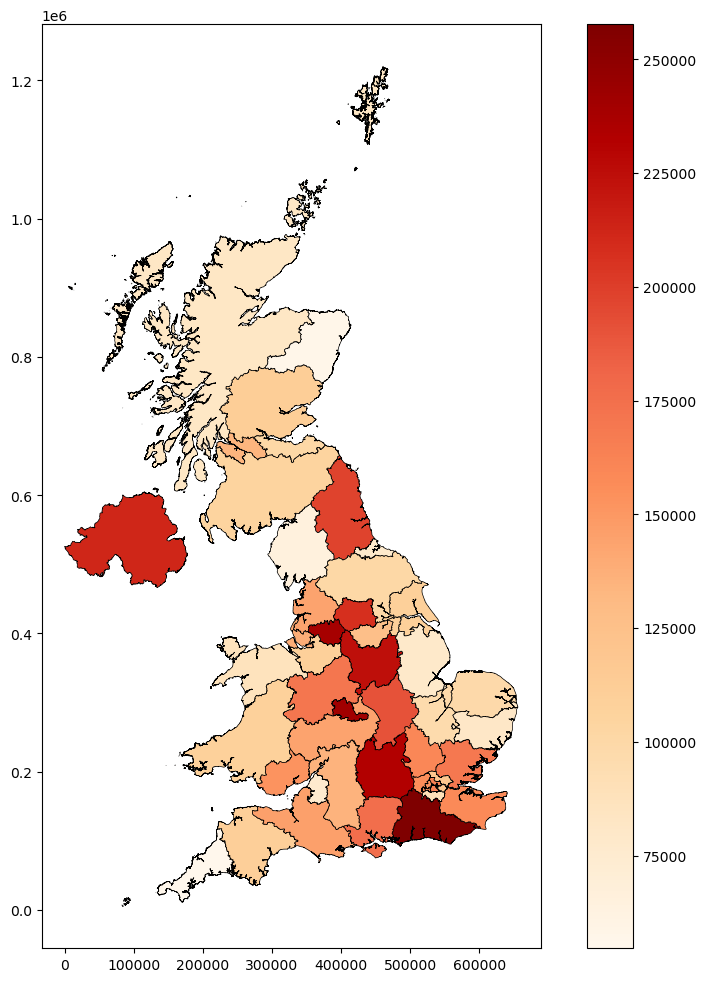

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))
condados_disueltos.plot(
    column='CO2 emissions within the scope of influence of LAs (kt CO2)',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)